## Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [61]:
poke_df = pd.read_csv("Pokemon.csv")
poke_df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Categorical : Type 1 

Continuous : HP, Attack, Defense, Speed

## Explore the variables using the univariate and bivariate methods you've learned so far.

Univariate Analysis:

1. Total Variables : 12

2. Continuous Variables : Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

3. Categorical Variables : Type 1, Type 2, Generation, Legendary (Name?)

In [62]:
# missing data
na_check = pd.isnull(poke_df).sum()
display(na_check)

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [63]:
# remove Type 2 & # column (missing data)
poke_df.drop(["#","Type 2","Generation","Legendary"],1,inplace=True)
poke_df.head(5)

,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,318,45,49,49,65,65,45
1,Ivysaur,Grass,405,60,62,63,80,80,60
2,Venusaur,Grass,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80
4,Charmander,Fire,309,39,52,43,60,50,65


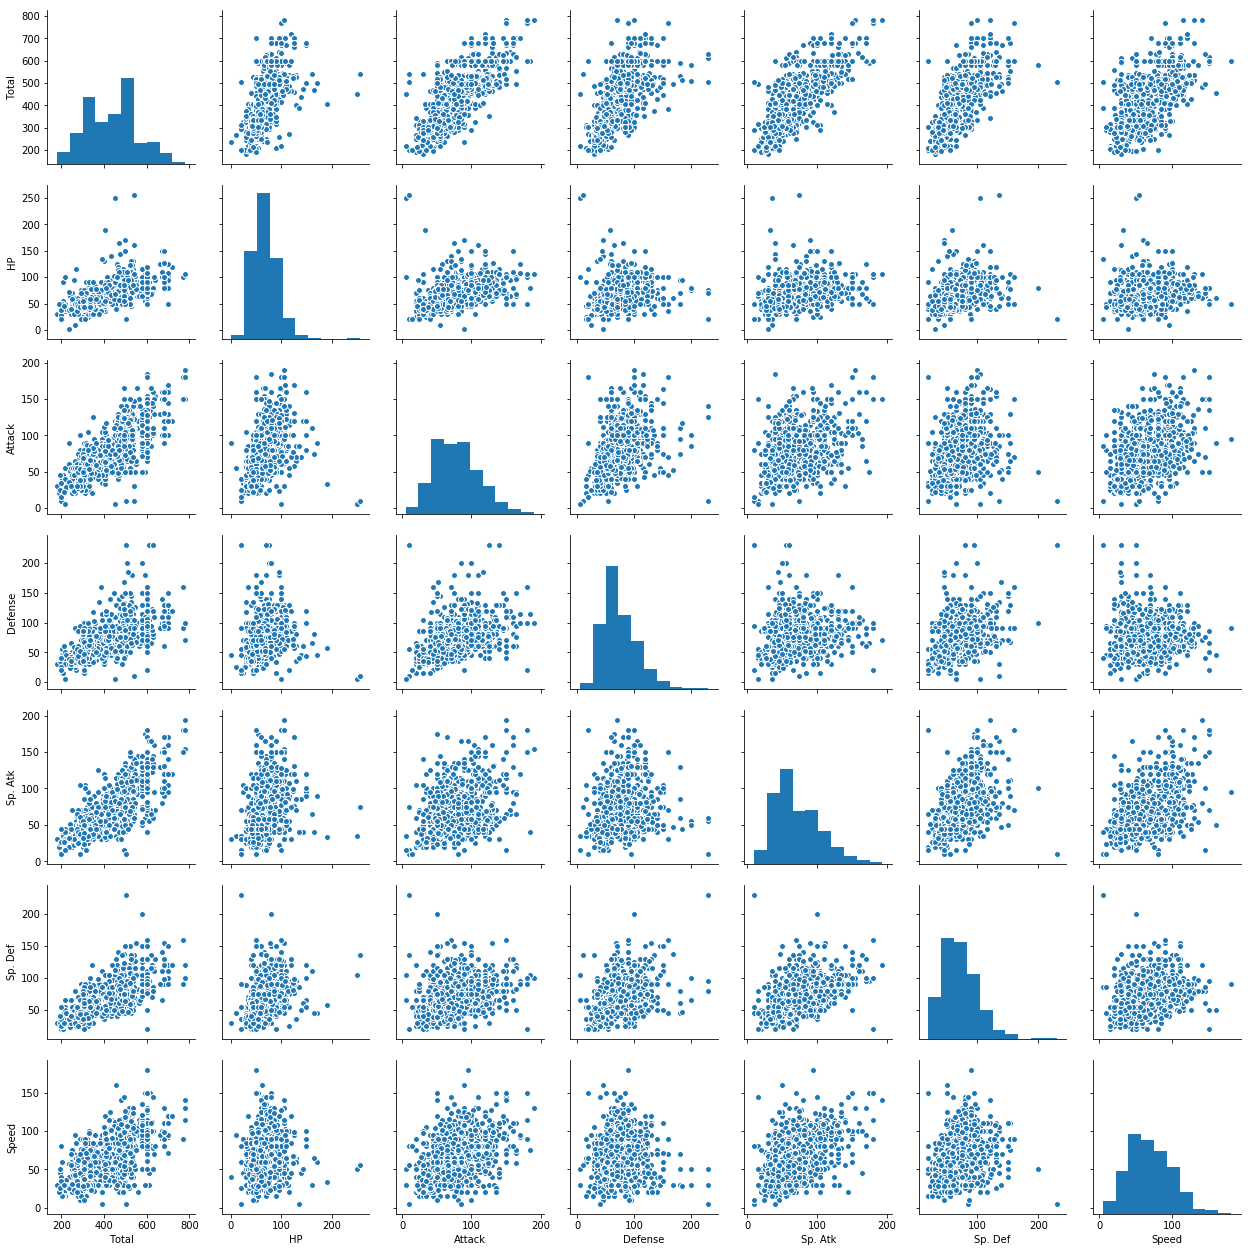

In [64]:
# probability distribution (normal, Poisson, Gamma, etc.)
sns.pairplot(poke_df)
plt.show()

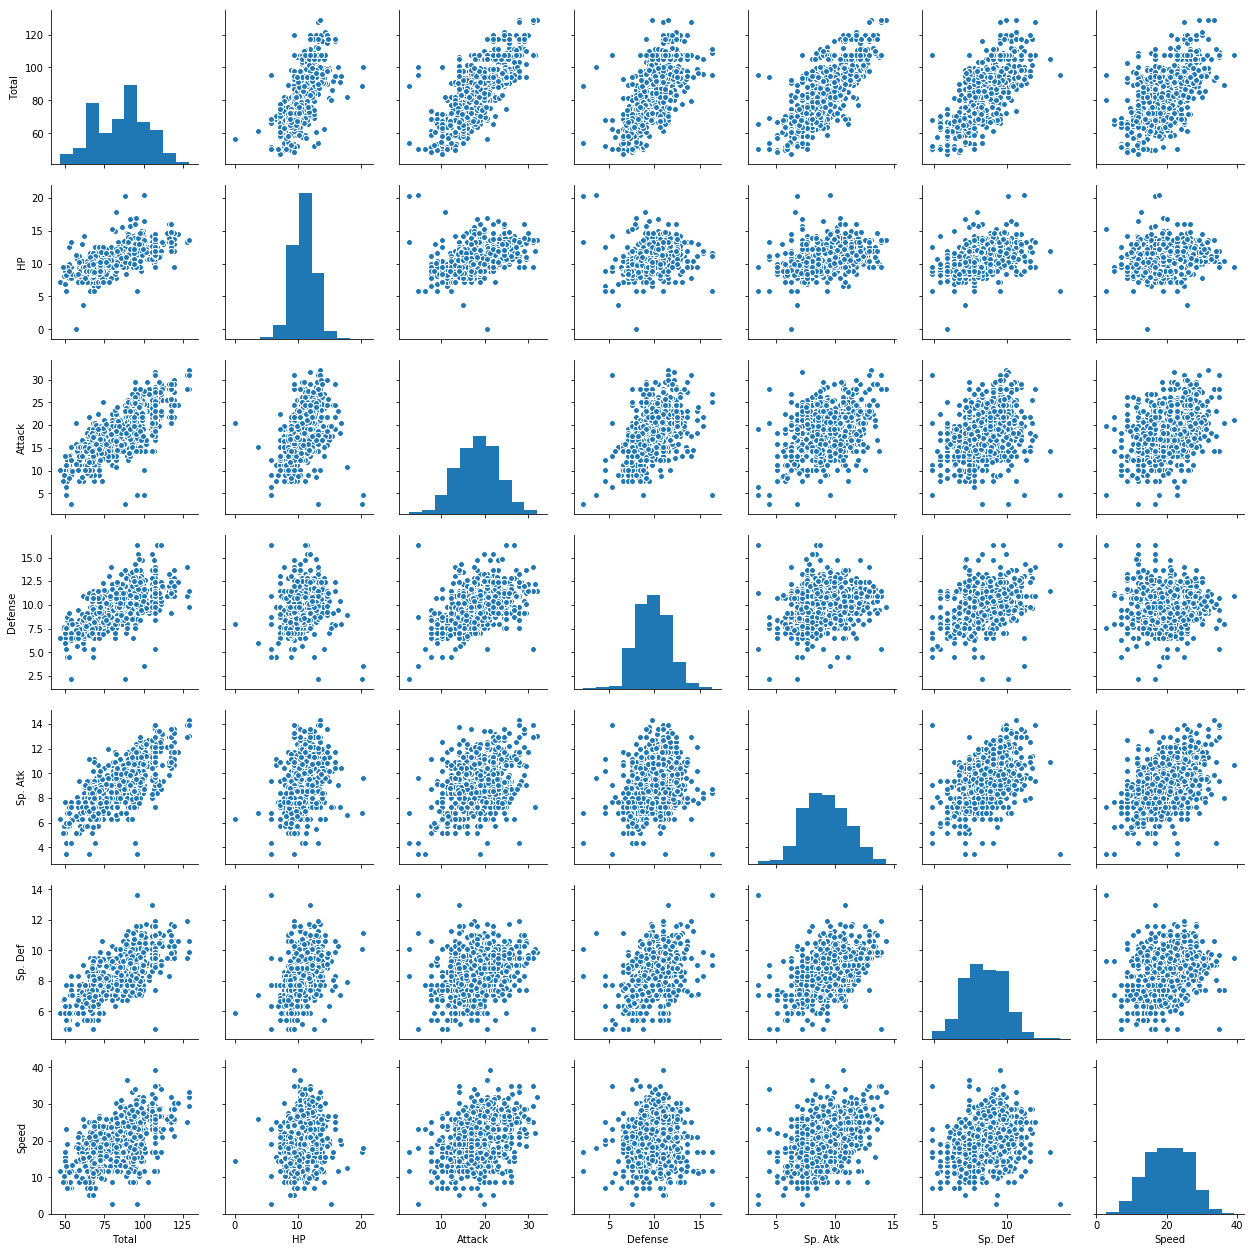

In [65]:
# transform data to normal distribution
def transform_df(df):
    from scipy import stats
    x,lam = stats.boxcox(df)
    return x

poke_df = poke_df.iloc[:,2:].apply(transform_df)
sns.pairplot(poke_df)
plt.show()

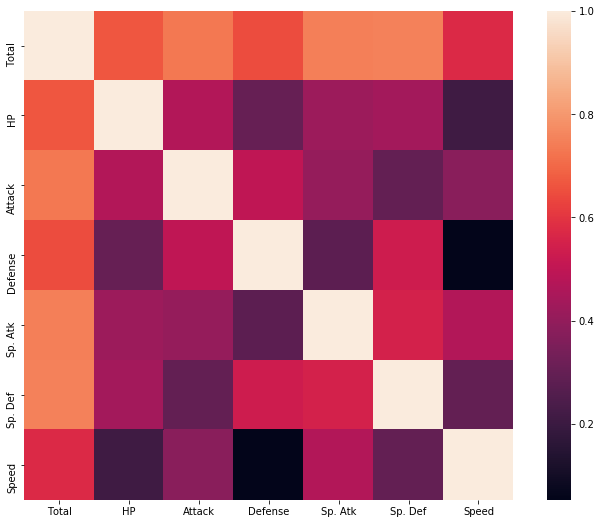

In [66]:
poke_corr = poke_df.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(poke_corr,square=True)
plt.show()

In [67]:
# variance in each variable
print(poke_df.var())

Total      269.252967
HP           3.766268
Attack      23.371067
Defense      3.507345
Sp. Atk      3.544524
Sp. Def      1.917419
Speed       36.703241
dtype: float64


Bivariate Analysis:

## Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

In [68]:
# percentage of total to display distribution of data as % of total stats
new_col = ["HP%Tot","Attk%Tot","Def%Tot","SpAttk%Tot","SpDef%Tot","Speed%Tot"]
old_col = list(poke_df.columns)[3:9]

for old,new in zip(old_col,new_col):
    poke_df[new] = poke_df[old] / poke_df["Total"]
poke_df.head(3)

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,HP%Tot,Attk%Tot,Def%Tot,SpAttk%Tot
0,69.756889,8.943887,14.049632,8.300129,9.043637,8.300086,15.630828,0.118987,0.129645,0.118986,0.224076
1,82.313055,10.337152,16.285033,9.326151,9.905108,9.045306,19.019258,0.113301,0.120335,0.109889,0.231060
2,98.258447,11.899970,19.354830,10.560611,10.899678,9.899403,23.073916,0.107478,0.110929,0.100749,0.234829


## Use filtering methods to select the five best features and justify your choices.

In [84]:
# normalize data --> variables have mean = 0 & std = 1
poke_pca = poke_df

X = StandardScaler().fit_transform(poke_pca)
poke_scaled = pd.DataFrame(X,columns=poke_pca.columns)
# PCA to filter dataframe to 5 components

sklearn_poke = PCA(n_components = 5)
Y_sklearn = sklearn_poke.fit_transform(X)
# PCA creates new features that have no association with old features, they stand apart (they are better)
print("Percentage of total variance in the dataset explained by each component: \n {}".format(sklearn_poke.explained_variance_ratio_))

Percentage of total variance in the dataset explained by each component: 
 [0.41217548 0.22530572 0.13830408 0.1013822  0.07940557]


In [81]:
display(pd.DataFrame(sklearn_poke.components_,columns=poke_scaled.columns,index=["PC-1","PC-2","PC-3","PC-4","PC-5"]))

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,HP%Tot,Attk%Tot,Def%Tot,SpAttk%Tot
PC-1,0.461084,0.335022,0.370818,0.262810,0.345300,0.305518,0.294938,-0.240207,-0.135473,-0.304865,-0.005527
PC-2,0.061097,0.097639,0.099201,0.442901,-0.167449,0.143722,-0.392410,0.447750,-0.318214,0.074954,-0.520281
PC-3,-0.071429,-0.086267,0.257529,0.062430,-0.420798,-0.370958,0.232703,0.167400,-0.517721,-0.367062,0.342948
PC-4,0.086245,-0.147592,-0.237490,0.098369,-0.176230,0.523201,0.287223,-0.007054,-0.374245,0.533098,0.305130
PC-5,-0.079915,0.600193,-0.007384,-0.425060,-0.298805,-0.000162,-0.188298,-0.423457,-0.322871,0.122751,-0.171120


In [83]:
# how to decide which features are relevant using PCA?